# Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contigency table. Do you observe different ratios between categories here?
- Create a bar plot for this contigency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

### Attibute information
- Age = age
- Sex = 0: Female, 1: male
- CP = chest pain type (4 values)
- TrestBps = resting blood pressure
- Chol = serum cholestoral in mg/dl
- FBS = fasting blood sugar > 120 mg/dl
- RestECG = resting electrocardiographic results (values 0,1,2)
- thalach = maximum heart rate achieved
- Exang = exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- Slope = the slope of the peak exercise ST segment
- CA = number of major vessels (0-3) colored by flourosopy
- thal = 0: normal; 1: fixed defect; 2: reversable defect
- target = 0: No Disease, 1: Disease

In [12]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
from scipy.stats import chi2_contingency

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
heart = pd.read_csv('Assignment 4 - Heart.csv', sep=',')

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Transformation

In [5]:
heart.sex = heart.sex.map( {0:"Female" , 1:"Male"} )
heart.fbs = heart.fbs.map( {0:False , 1:True} )
heart.exang = heart.exang.map( {0:False , 1:True} )
heart.target = heart.target.map( {0:"No diseas", 1:"Disease"})
heart.thal = heart.thal.map( {0:"Normal", 1:"Fixed defect", 2:"Reversable defect"})
heart.cp = heart.cp.map( {0:"None", 1:"Minor", 2:"Severe", 3:"Major"})
heart.slope = heart.slope.map( {0:"None", 1:"Minor", 2:"Major"})

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Major,145,233,True,0,150,False,2.3,None,0,Fixed defect,Disease
1,37,Male,Severe,130,250,False,1,187,False,3.5,None,0,Reversable defect,Disease
2,41,Female,Minor,130,204,False,0,172,False,1.4,Major,0,Reversable defect,Disease
3,56,Male,Minor,120,236,False,1,178,False,0.8,Major,0,Reversable defect,Disease
4,57,Female,None,120,354,False,1,163,True,0.6,Major,0,Reversable defect,Disease


## Sex vs Chestpain

#### Do you expect their to be a correlation between the two columns?
##### No.

In [9]:
contingencyTable = heart.groupby(['cp','sex']).size().unstack('cp', fill_value=0)
contingencyTable

cp,Major,Minor,None,Severe
sex,,,,
Female,4,18,39,35
Male,19,32,104,52


#### Create a contigency table. Do you observe different ratios between categories here?
##### De ratios verschillen nogal van elkaar.

<AxesSubplot:xlabel='sex'>

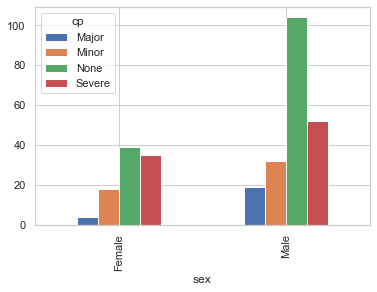

In [10]:
contingencyTable.plot(kind='bar')

#### Create a bar plot for this contigency table. Do you observe different ratios between categories here?
##### Ja, de ratios verschillen nogal van elkaar.

In [13]:
chi2_contingency(contingencyTable)

(6.822075813213287,
 0.07779031388551413,
 3,
 array([[ 7.28712871, 15.84158416, 45.30693069, 27.56435644],
        [15.71287129, 34.15841584, 97.69306931, 59.43564356]]))

#### Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?
##### het resultaat geeft aan dat er kans is van 7.8% dat er geen verband is tussen de twee kolommen.

## Target vs Chestpain

#### Do you expect their to be a correlation between the two columns?
##### Yes.

In [15]:
contingencyTable = heart.groupby(['cp','target']).size().unstack('cp', fill_value=0)
contingencyTable

cp,Major,Minor,None,Severe
target,,,,
Disease,16,41,39,69
No diseas,7,9,104,18


#### Create a contigency table. Do you observe different ratios between categories here?
##### De ratio's verschillen wat van elkaar.

<AxesSubplot:xlabel='target'>

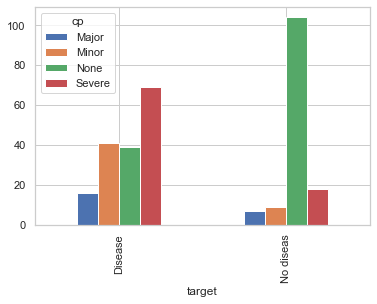

In [16]:
contingencyTable.plot(kind='bar')

#### Create a bar plot for this contigency table. Do you observe different ratios between categories here?
##### Ja, de ratios wel aardig van elkaar.

In [17]:
chi2_contingency(contingencyTable)

(81.68642755194445,
 1.3343043373050064e-17,
 3,
 array([[12.52475248, 27.22772277, 77.87128713, 47.37623762],
        [10.47524752, 22.77227723, 65.12871287, 39.62376238]]))

#### Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?
##### het resultaat geeft aan dat er een miniscuul kleine kans bestaat dat er geen verband is tussen de twee kolommen.